### **BEER ANALYSIS**

In [44]:
import pandas as pd
import numpy as np
import utils_results
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
importlib.reload(utils_results)

<module 'utils_results' from '/Users/arimongomis/Desktop/EPFL/ADA/ada-2024-project-mediterranean/utils_results.py'>

In [10]:
beer_BA = pd.read_csv('data/Processed/BeerAdvocate/beers_processed.csv')
beer_RB = pd.read_csv('data/Processed/RateBeer/beers_processed.csv')

/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/1516806631.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  beer_RB = pd.read_csv('data/Processed/RateBeer/beers_processed.csv')


### 1. Score correlation

We have different scores on the beers, we'll now first analyse the correlation between them, as well as with the number of ratings.

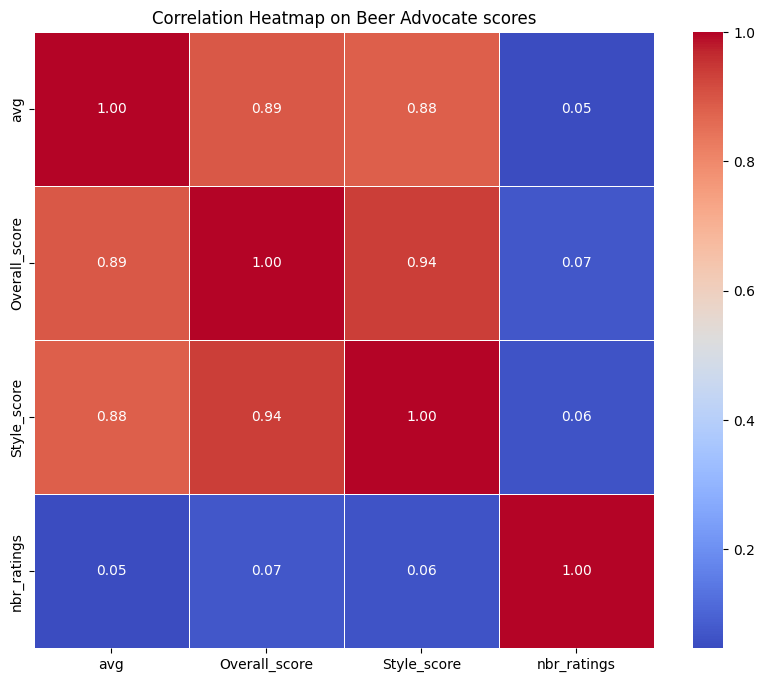

In [ ]:
# Beer Advocate

correlation_matrix = beer_BA[['avg', 'Overall_score', 'Style_score',
                              'nbr_ratings']].corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap on Beer Advocate scores")
plt.show()

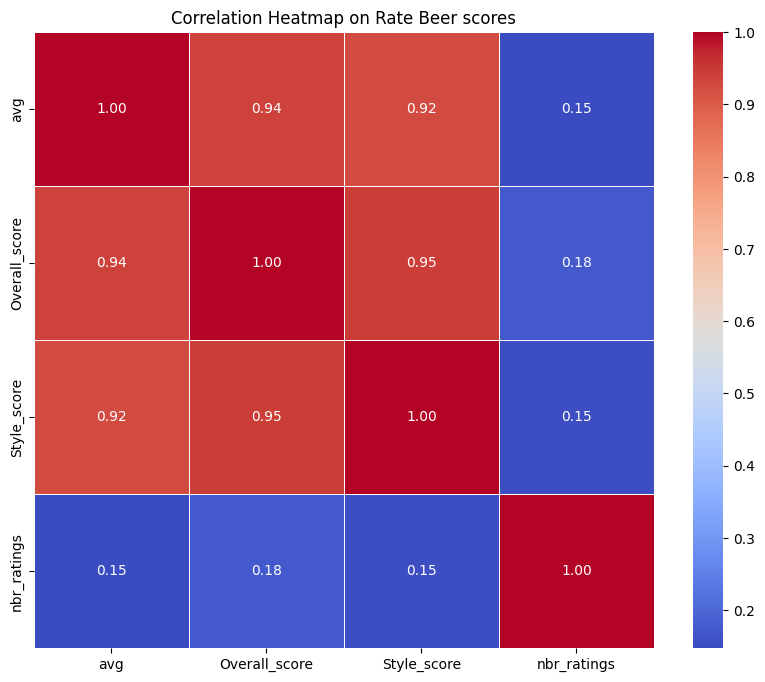

In [ ]:
# Rate Beer

correlation_matrix = beer_RB[['avg', 'Overall_score', 'Style_score',
                              'nbr_ratings']].corr()

# Display the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap on Rate Beer scores")
plt.show()

As it can be seen, the number of ratings do not highly relate to the score obtained either overall or style.

### 2. Top Beers by scores

We'll now visualize the top beers when it comes to average, overall and style score for both datasets.

/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/2750069818.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_beers, x='avg', y='beer_name', ax=axes[0], palette='viridis')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/2750069818.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_name', ax=axes[1], palette='coolwarm')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/2750069818.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.bar

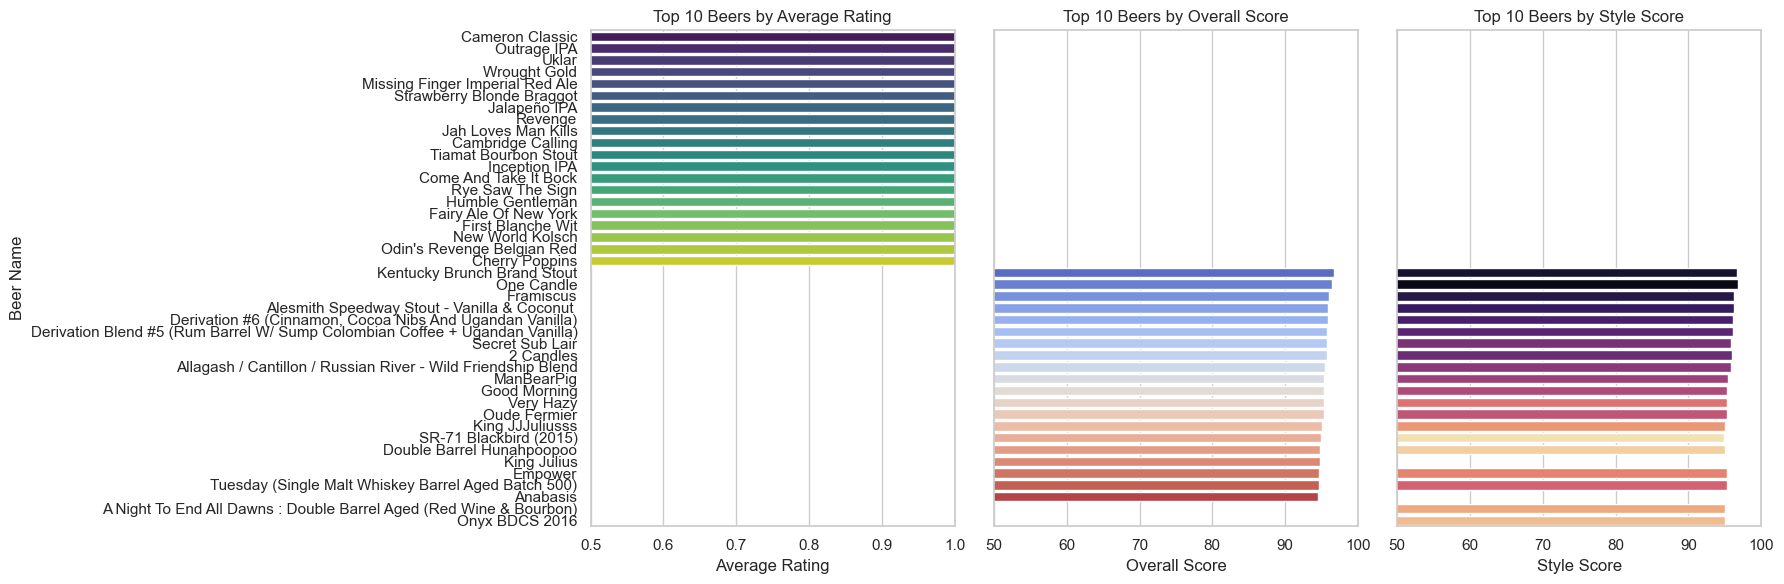

In [32]:
#1. Beer Advocate

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_BA[['beer_name', 'avg']].sort_values(by='avg', ascending=False).head(20)
top_overall_beers = beer_BA[['beer_name', 'Overall_score']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_BA[['beer_name', 'Style_score']].sort_values(by='Style_score', ascending=False).head(20)

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure for 3 separate plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot top beers by avg
sns.barplot(data=top_avg_beers, x='avg', y='beer_name', ax=axes[0], palette='viridis')
axes[0].set_xlim(0.5,1)  # Adjust x-axis limits for avg
axes[0].set_title("Top 10 Beers by Average Rating")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("Beer Name")

# Plot top beers by overall score
sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_name', ax=axes[1], palette='coolwarm')
axes[1].set_xlim(50,100)
axes[1].set_title("Top 10 Beers by Overall Score")
axes[1].set_xlabel("Overall Score")
axes[1].set_ylabel("")

# Plot top beers by style score
sns.barplot(data=top_style_beers, x='Style_score', y='beer_name', ax=axes[2], palette='magma')
axes[2].set_xlim(50,100)
axes[2].set_title("Top 10 Beers by Style Score")
axes[2].set_xlabel("Style Score")
axes[2].set_ylabel("")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

We see that the top 10 beers in average score all score 1 (normalized), so at this point we might also have to take into account the number of ratings for each beer so that the analysis is not biased.

We'll now compute the Weighted Average (Bayesian average):

$$
\begin{equation}
WA = \frac{(\bar{x} \cdot n) + (\mu \cdot m)}{n+m}
\end{equation}
$$

where $\bar{x}$ is the score average, $n$ is the number of ratings, $\mu$ is the global average score (mean of all avg scores), and $m$ is the weighting threshold, which we'll set to the median.

In [35]:
global_avg_mean_ba=np.mean(beer_BA['avg'])
weighting_thres_ba=beer_BA['nbr_ratings'].median()

In [45]:
beer_BA['wavg']=beer_BA.apply(utils_results.calculate_weighted_avg,axis=1,global_mean=global_avg_mean_ba,m=weighting_thres_ba)

Then again, we'll plot the scores for the top 20 beers.

/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/2631463374.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_beers, x='wavg', y='beer_name', ax=axes[0], palette='viridis')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/2631463374.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_name', ax=axes[1], palette='coolwarm')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/2631463374.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.ba

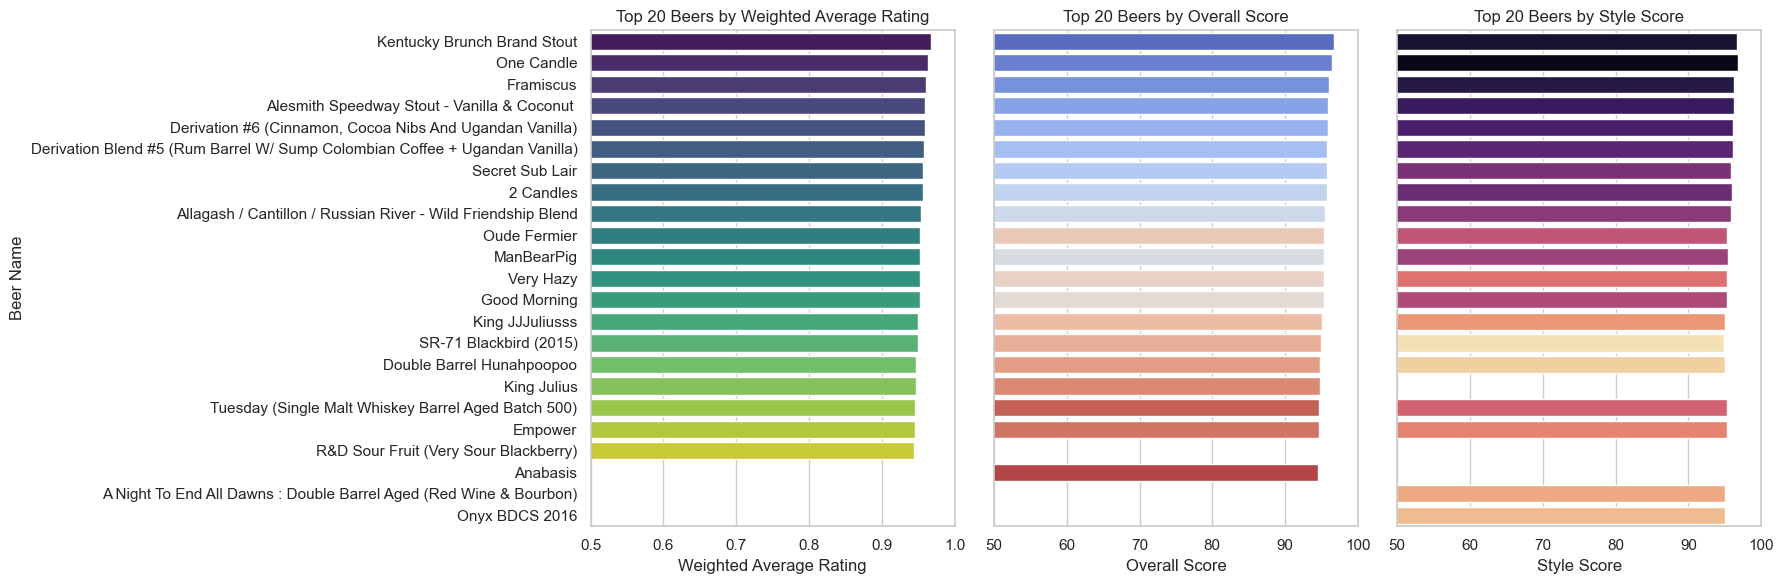

In [46]:
#1. Beer Advocate

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_BA[['beer_name', 'wavg']].sort_values(by='wavg', ascending=False).head(20)
top_overall_beers = beer_BA[['beer_name', 'Overall_score']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_BA[['beer_name', 'Style_score']].sort_values(by='Style_score', ascending=False).head(20)

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure for 3 separate plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot top beers by avg
sns.barplot(data=top_avg_beers, x='wavg', y='beer_name', ax=axes[0], palette='viridis')
axes[0].set_xlim(0.5,1)  # Adjust x-axis limits for avg
axes[0].set_title("Top 20 Beers by Weighted Average Rating")
axes[0].set_xlabel("Weighted Average Rating")
axes[0].set_ylabel("Beer Name")

# Plot top beers by overall score
sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_name', ax=axes[1], palette='coolwarm')
axes[1].set_xlim(50,100)
axes[1].set_title("Top 20 Beers by Overall Score")
axes[1].set_xlabel("Overall Score")
axes[1].set_ylabel("")

# Plot top beers by style score
sns.barplot(data=top_style_beers, x='Style_score', y='beer_name', ax=axes[2], palette='magma')
axes[2].set_xlim(50,100)
axes[2].set_title("Top 20 Beers by Style Score")
axes[2].set_xlabel("Style Score")
axes[2].set_ylabel("")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Now we can see there is more variation on the average score obtained by the top 20 beers. Also, we can see that the different scores show similar results.

/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/2879250054.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_beers, x='avg', y='beer_name', ax=axes[0], palette='viridis')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/2879250054.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_name', ax=axes[1], palette='coolwarm')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/2879250054.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.bar

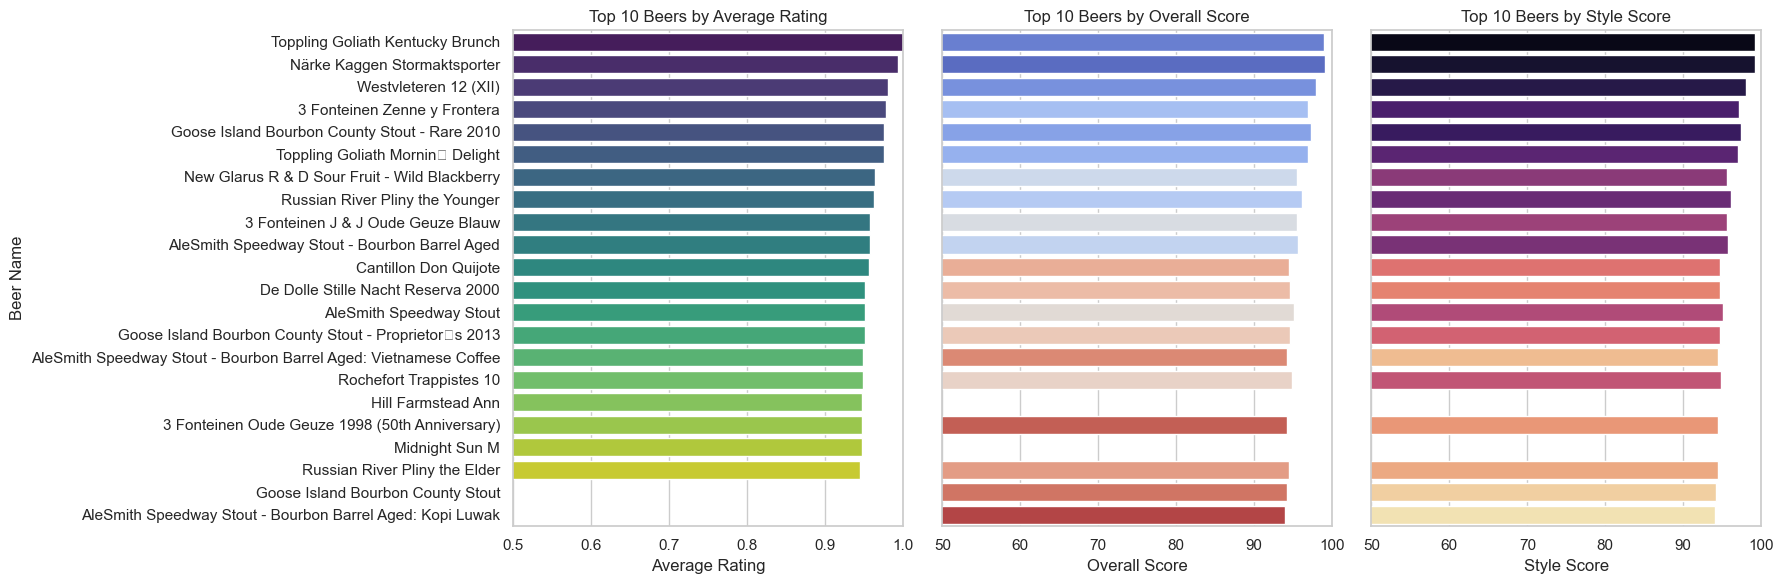

In [ ]:
#2. Rate Beer

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_RB[['beer_name', 'avg']].sort_values(by='avg', ascending=False).head(20)
top_overall_beers = beer_RB[['beer_name', 'Overall_score']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_RB[['beer_name', 'Style_score']].sort_values(by='Style_score', ascending=False).head(20)

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure for 3 separate plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot top beers by avg
sns.barplot(data=top_avg_beers, x='avg', y='beer_name', ax=axes[0], palette='viridis')
axes[0].set_xlim(0.5,1)
axes[0].set_title("Top 20 Beers by Average Rating")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("Beer Name")

# Plot top beers by overall score
sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_name', ax=axes[1], palette='coolwarm')
axes[1].set_xlim(50,100)
axes[1].set_title("Top 20 Beers by Overall Score")
axes[1].set_xlabel("Overall Score")
axes[1].set_ylabel("")

# Plot top beers by style score
sns.barplot(data=top_style_beers, x='Style_score', y='beer_name', ax=axes[2], palette='magma')
axes[2].set_xlim(50,100)
axes[2].set_title("Top 20 Beers by Style Score")
axes[2].set_xlabel("Style Score")
axes[2].set_ylabel("")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

We'll also compute the average weighted for Rate Beer.

In [47]:
global_avg_mean_rb=np.mean(beer_RB['avg'])
weighting_thres_rb=beer_RB['nbr_ratings'].median()

In [48]:
beer_RB['wavg']=beer_RB.apply(utils_results.calculate_weighted_avg,axis=1,global_mean=global_avg_mean_rb,m=weighting_thres_rb)

/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/3295173936.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_beers, x='wavg', y='beer_name', ax=axes[0], palette='viridis')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/3295173936.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_name', ax=axes[1], palette='coolwarm')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/3295173936.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.ba

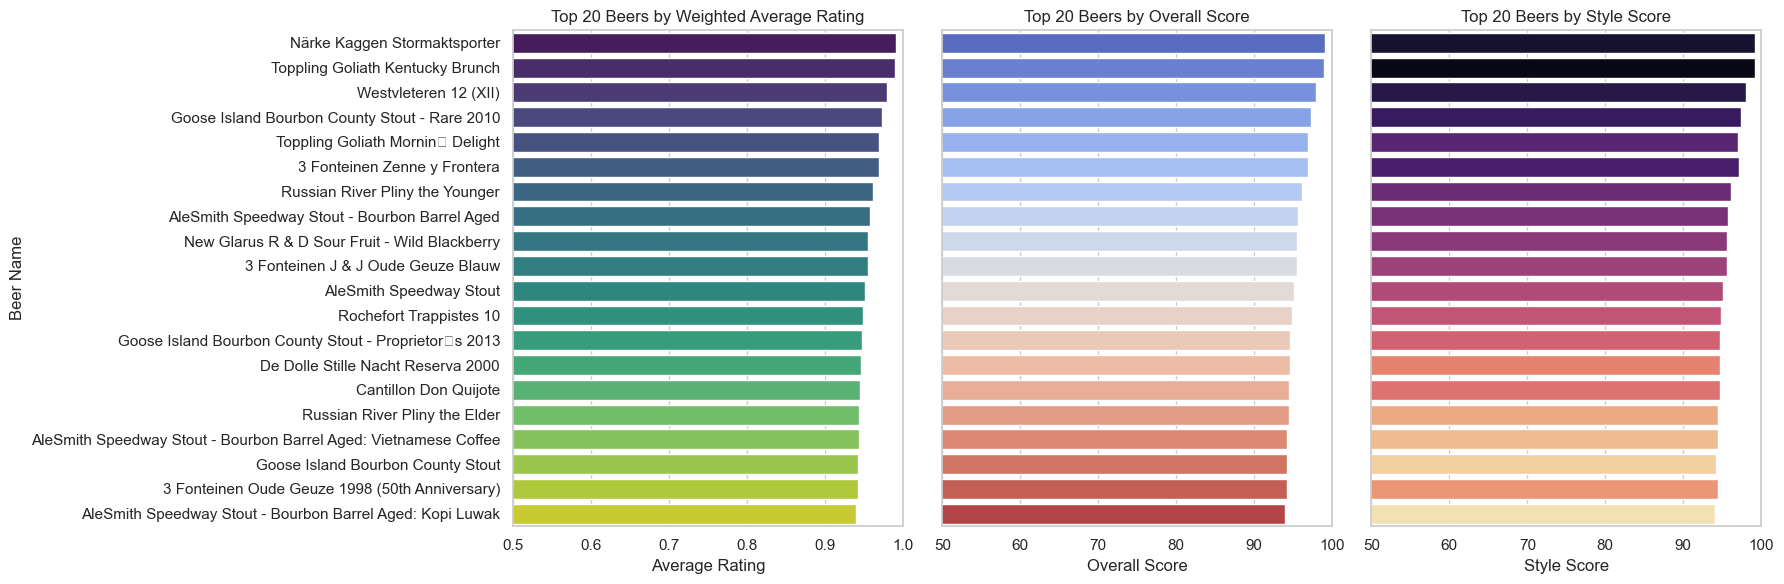

In [49]:
#2. Rate Beer

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_RB[['beer_name', 'wavg']].sort_values(by='wavg', ascending=False).head(20)
top_overall_beers = beer_RB[['beer_name', 'Overall_score']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_RB[['beer_name', 'Style_score']].sort_values(by='Style_score', ascending=False).head(20)

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure for 3 separate plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot top beers by avg
sns.barplot(data=top_avg_beers, x='wavg', y='beer_name', ax=axes[0], palette='viridis')
axes[0].set_xlim(0.5,1)
axes[0].set_title("Top 20 Beers by Weighted Average Rating")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("Beer Name")

# Plot top beers by overall score
sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_name', ax=axes[1], palette='coolwarm')
axes[1].set_xlim(50,100)
axes[1].set_title("Top 20 Beers by Overall Score")
axes[1].set_xlabel("Overall Score")
axes[1].set_ylabel("")

# Plot top beers by style score
sns.barplot(data=top_style_beers, x='Style_score', y='beer_name', ax=axes[2], palette='magma')
axes[2].set_xlim(50,100)
axes[2].set_title("Top 20 Beers by Style Score")
axes[2].set_xlabel("Style Score")
axes[2].set_ylabel("")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In this specific case, the same beers appear in each top 20. 

### 3. Beer styles

We can also take a look at the beer styles and how many different beers each style has.

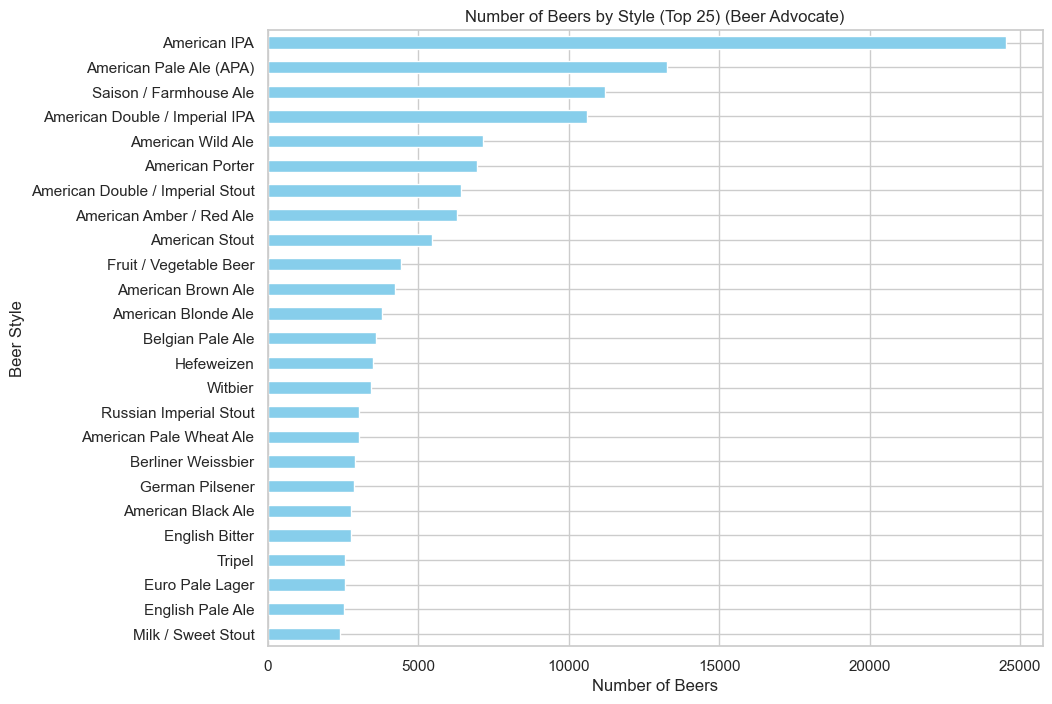

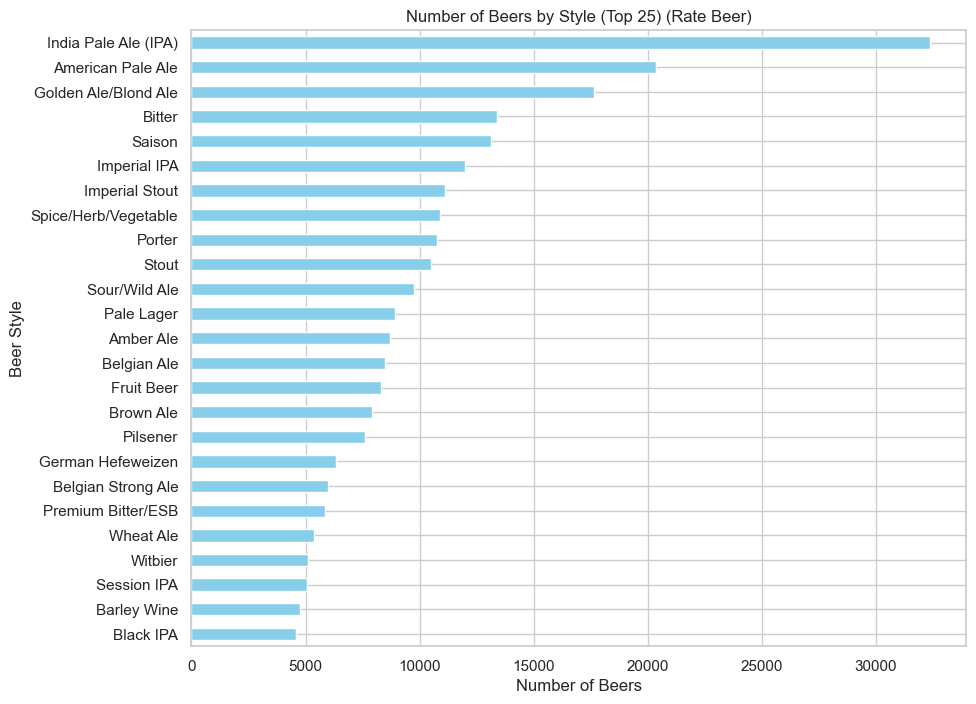

In [ ]:
# Count the number of beers per style
style_counts_ba = beer_BA['style'].value_counts()[:25]
style_counts_rb = beer_RB['style'].value_counts()[:25]

# Plot a horizontal bar chart of the beer count by style
# Beer Advocate
plt.figure(figsize=(10, 8))  
style_counts_ba.plot(kind='barh', color='skyblue')
plt.title('Number of Beers by Style (Top 25) (Beer Advocate)')
plt.xlabel('Number of Beers')
plt.ylabel('Beer Style')
plt.gca().invert_yaxis() 
plt.show()

# Rate Beer
plt.figure(figsize=(10, 8))  
style_counts_rb.plot(kind='barh', color='skyblue')
plt.title('Number of Beers by Style (Top 25) (Rate Beer)')
plt.xlabel('Number of Beers')
plt.ylabel('Beer Style')
plt.gca().invert_yaxis() 
plt.show()

It can be seen that American IPA is the most popular style when it comes to beer producing in the BA dataset, and the Indian Pale Ale for the Rate Beer.

### 4. Number of beers produced by location

We can also analyse the number of beers produced by countries.

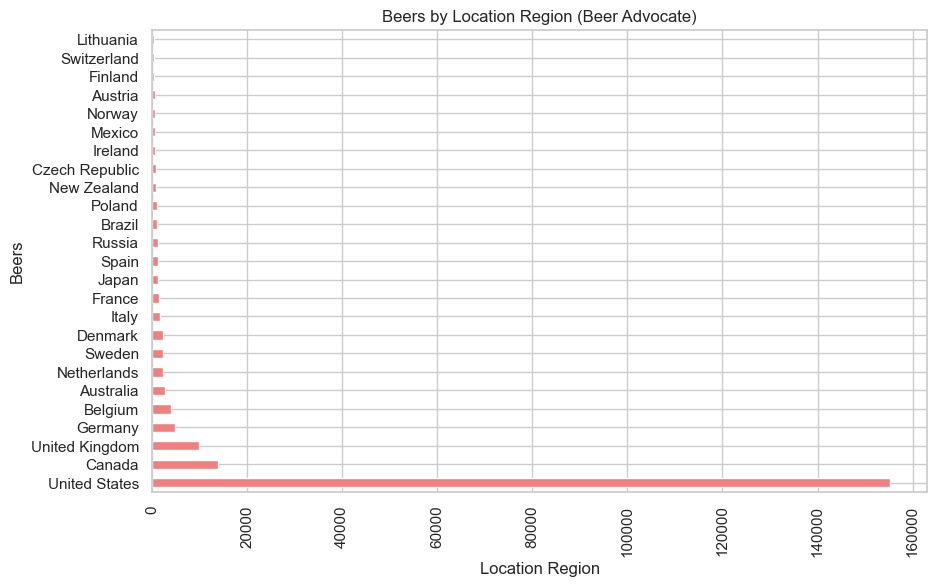

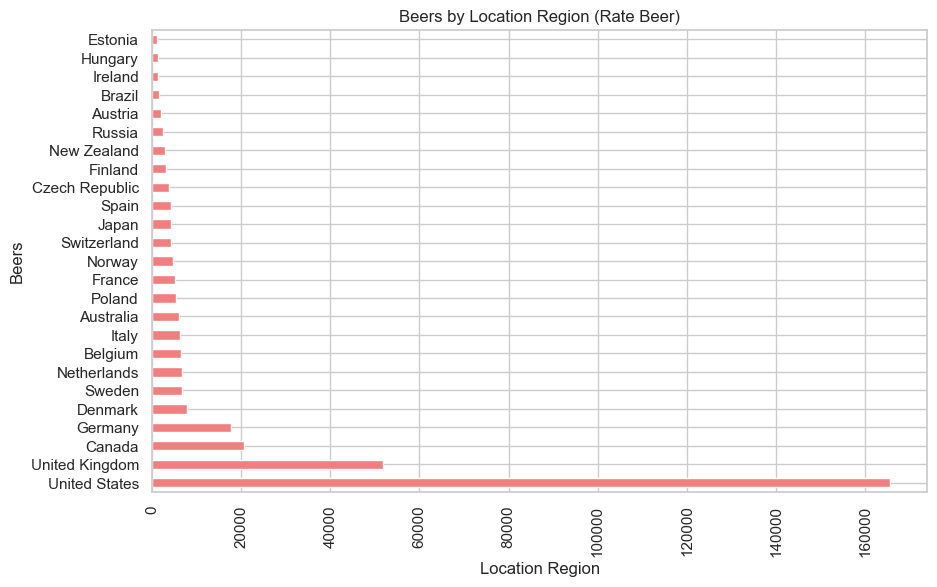

In [55]:
# Count of beers by region or country
location_counts_ba = beer_BA['location'].value_counts()[:25]
location_counts_rb = beer_RB['location'].value_counts()[:25]

# Plot a bar chart of beers by country
#Beer Advocate
plt.figure(figsize=(10, 6))
location_counts_ba.plot(kind='barh', color='lightcoral')
plt.title('Beers by Location Region (Beer Advocate)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

#Rate Beer
plt.figure(figsize=(10, 6))
location_counts_rb.plot(kind='barh', color='lightcoral')
plt.title('Beers by Location Region (Rate Beer)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

As it can be seen, United States is the top beer producer with regards the information in this dataset, we can conduct a side analysis on United States.

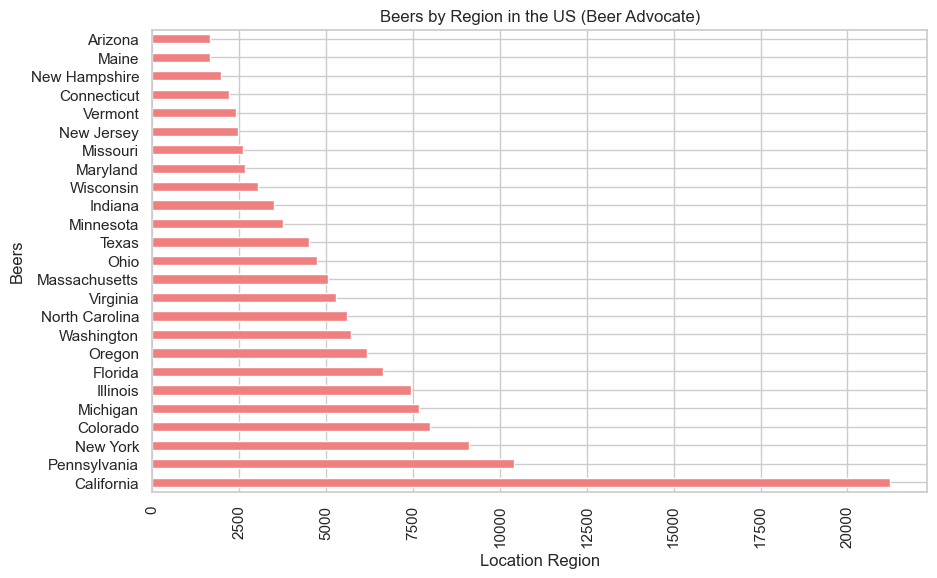

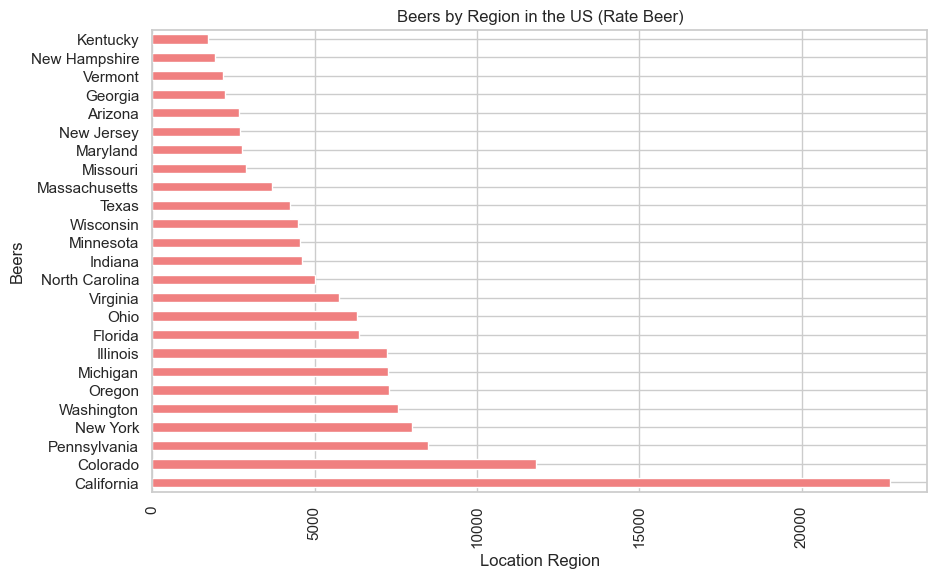

In [58]:
# Count of breweries by region or country
location_counts_ba = beer_BA[beer_BA['location']=='United States']['location_region'].value_counts()[:25]
location_counts_rb = beer_RB[beer_RB['location']=='United States']['location_region'].value_counts()[:25]

# Plot a bar chart of breweries by region in US
# Beer Advocate
plt.figure(figsize=(10, 6))
location_counts_ba.plot(kind='barh', color='lightcoral')
plt.title('Beers by Region in the US (Beer Advocate)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

# Rate Beer
plt.figure(figsize=(10, 6))
location_counts_rb.plot(kind='barh', color='lightcoral')
plt.title('Beers by Region in the US (Rate Beer)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

California is indeed the US state producing the more beers.

We can carry out the same analysis with the United Kingdom.

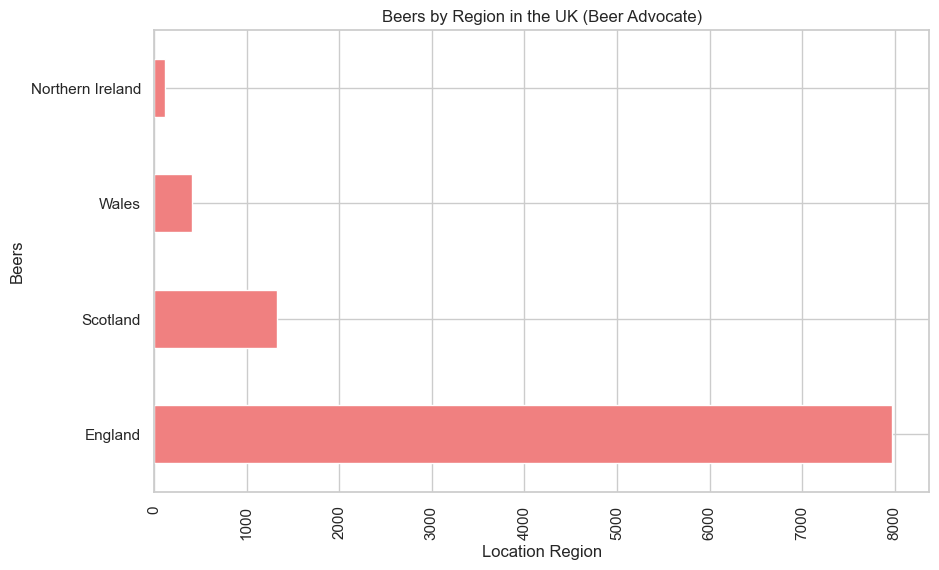

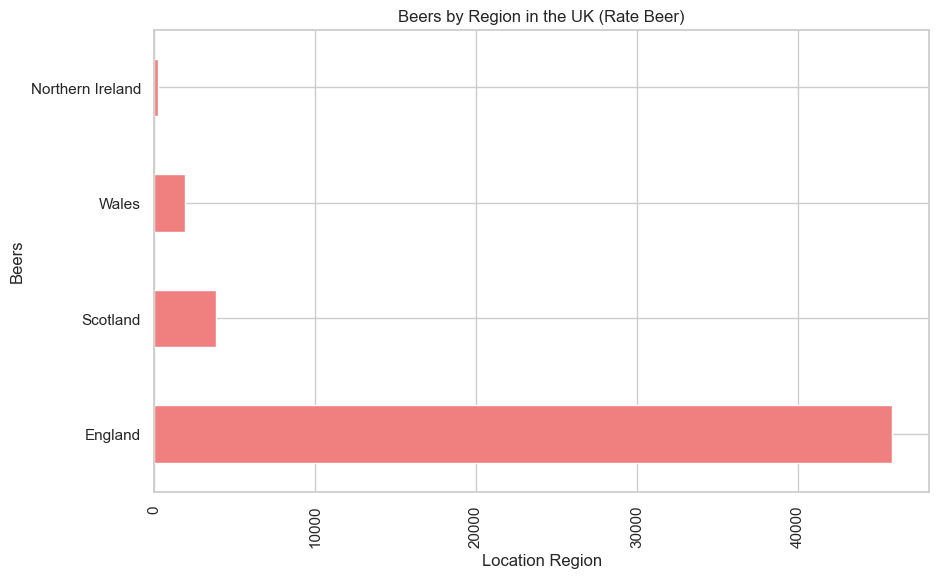

In [59]:
# Count of breweries by region or country
location_counts_ba = beer_BA[beer_BA['location']=='United Kingdom']['location_region'].value_counts()[:25]
location_counts_rb = beer_RB[beer_RB['location']=='United Kingdom']['location_region'].value_counts()[:25]

# Plot a bar chart of breweries by region in US
# Beer Advocate
plt.figure(figsize=(10, 6))
location_counts_ba.plot(kind='barh', color='lightcoral')
plt.title('Beers by Region in the UK (Beer Advocate)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

# Rate Beer
plt.figure(figsize=(10, 6))
location_counts_rb.plot(kind='barh', color='lightcoral')
plt.title('Beers by Region in the UK (Rate Beer)')
plt.xlabel('Location Region')
plt.ylabel('Beers')
plt.xticks(rotation=90)
plt.show()

We'll now carry out the top beers analysis but taking into account the location as well.

/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/1979725914.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_beers, x='wavg', y='beer_label', ax=axes[0], palette='viridis')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/1979725914.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_label', ax=axes[1], palette='coolwarm')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/1979725914.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.

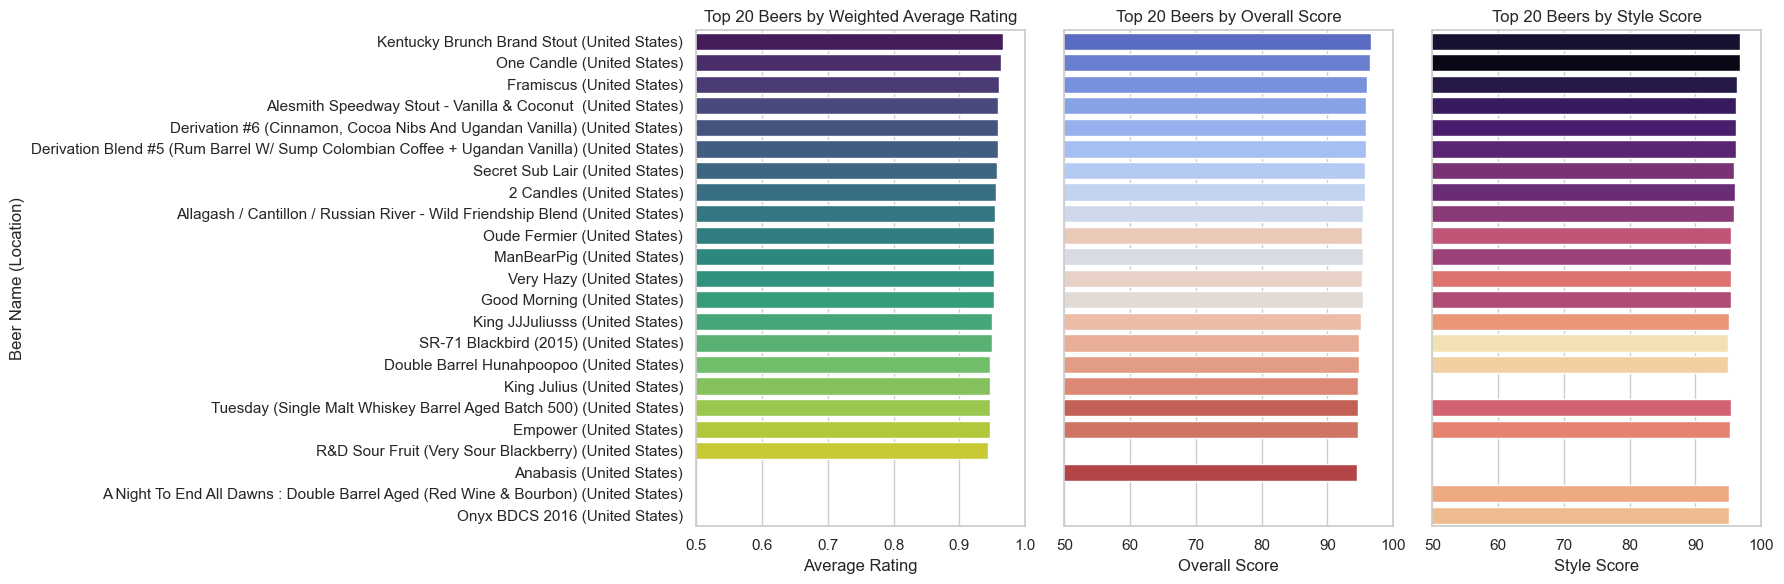

In [63]:
#1. Beer Advocate

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_BA[['beer_name', 'wavg', 'location']].sort_values(by='wavg', ascending=False).head(20)
top_overall_beers = beer_BA[['beer_name', 'Overall_score', 'location']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_BA[['beer_name', 'Style_score', 'location']].sort_values(by='Style_score', ascending=False).head(20)

# Create a new column combining beer name and location for display
top_avg_beers['beer_label'] = top_avg_beers['beer_name'] + " (" + top_avg_beers['location'] + ")"
top_overall_beers['beer_label'] = top_overall_beers['beer_name'] + " (" + top_overall_beers['location'] + ")"
top_style_beers['beer_label'] = top_style_beers['beer_name'] + " (" + top_style_beers['location'] + ")"

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure for 3 separate plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot top beers by avg
sns.barplot(data=top_avg_beers, x='wavg', y='beer_label', ax=axes[0], palette='viridis')
axes[0].set_xlim(0.5, 1) 
axes[0].set_title("Top 20 Beers by Weighted Average Rating")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("Beer Name (Location)")

# Plot top beers by overall score
sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_label', ax=axes[1], palette='coolwarm')
axes[1].set_xlim(50, 100)
axes[1].set_title("Top 20 Beers by Overall Score")
axes[1].set_xlabel("Overall Score")
axes[1].set_ylabel("")  # Remove duplicate ylabel for cleaner layout

# Plot top beers by style score
sns.barplot(data=top_style_beers, x='Style_score', y='beer_label', ax=axes[2], palette='magma')
axes[2].set_xlim(50, 100)
axes[2].set_title("Top 20 Beers by Style Score")
axes[2].set_xlabel("Style Score")
axes[2].set_ylabel("")  # Remove duplicate ylabel for cleaner layout

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

When it comes to the Beer Advocate database, all of the top 20 ranked beer are indeed from USA.

/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/3801709633.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_avg_beers, x='wavg', y='beer_label', ax=axes[0], palette='viridis')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/3801709633.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_label', ax=axes[1], palette='coolwarm')
/var/folders/f2/lknnry_j3z56bccrc_z41lm40000gn/T/ipykernel_62113/3801709633.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.

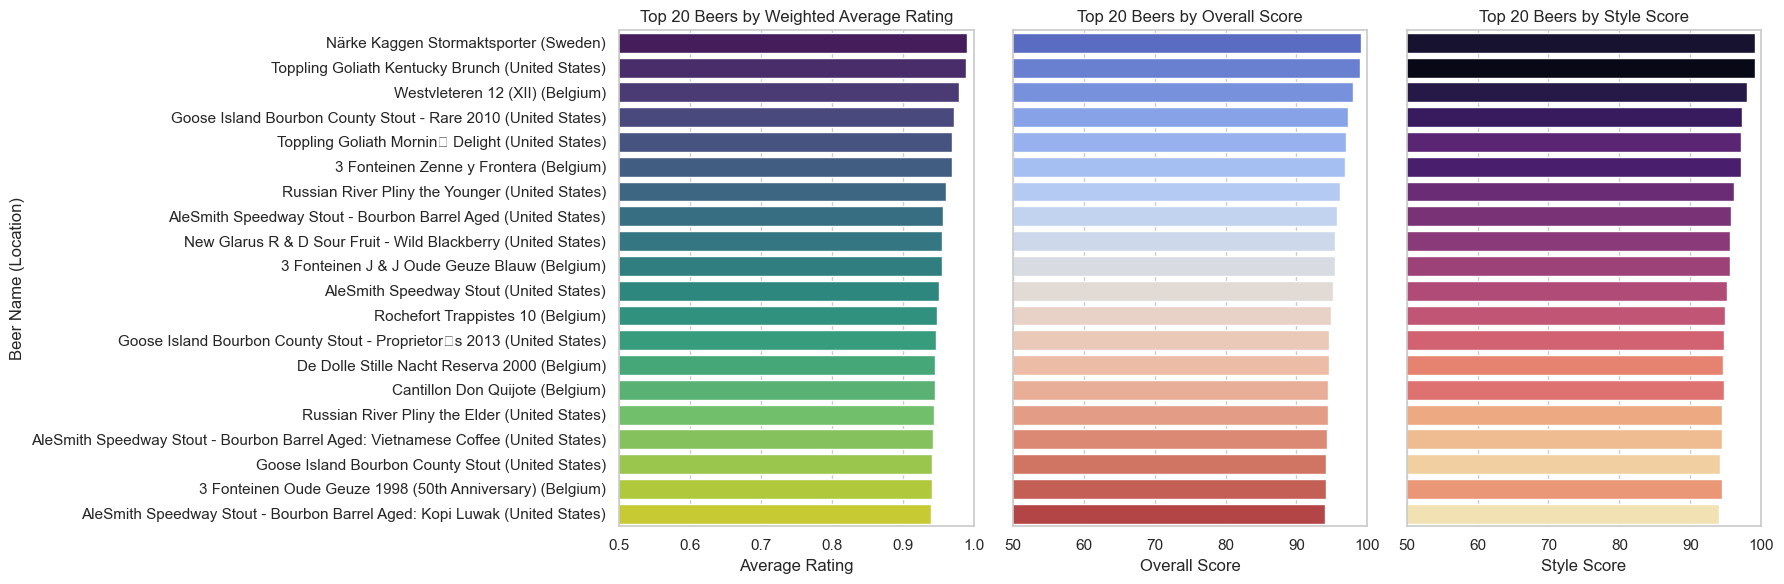

In [62]:
#2. Rate Beer

# Sort beers by avg, overall score, and style score
top_avg_beers = beer_RB[['beer_name', 'wavg', 'location']].sort_values(by='wavg', ascending=False).head(20)
top_overall_beers = beer_RB[['beer_name', 'Overall_score', 'location']].sort_values(by='Overall_score', ascending=False).head(20)
top_style_beers = beer_RB[['beer_name', 'Style_score', 'location']].sort_values(by='Style_score', ascending=False).head(20)

# Create a new column combining beer name and location for display
top_avg_beers['beer_label'] = top_avg_beers['beer_name'] + " (" + top_avg_beers['location'] + ")"
top_overall_beers['beer_label'] = top_overall_beers['beer_name'] + " (" + top_overall_beers['location'] + ")"
top_style_beers['beer_label'] = top_style_beers['beer_name'] + " (" + top_style_beers['location'] + ")"

# Set the style of the plots
sns.set(style="whitegrid")

# Create a figure for 3 separate plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot top beers by avg
sns.barplot(data=top_avg_beers, x='wavg', y='beer_label', ax=axes[0], palette='viridis')
axes[0].set_xlim(0.5, 1)
axes[0].set_title("Top 20 Beers by Weighted Average Rating")
axes[0].set_xlabel("Average Rating")
axes[0].set_ylabel("Beer Name (Location)")

# Plot top beers by overall score
sns.barplot(data=top_overall_beers, x='Overall_score', y='beer_label', ax=axes[1], palette='coolwarm')
axes[1].set_xlim(50, 100)
axes[1].set_title("Top 20 Beers by Overall Score")
axes[1].set_xlabel("Overall Score")
axes[1].set_ylabel("")  # Remove duplicate ylabel for cleaner layout

# Plot top beers by style score
sns.barplot(data=top_style_beers, x='Style_score', y='beer_label', ax=axes[2], palette='magma')
axes[2].set_xlim(50, 100)
axes[2].set_title("Top 20 Beers by Style Score")
axes[2].set_xlabel("Style Score")
axes[2].set_ylabel("")  # Remove duplicate ylabel for cleaner layout

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In the Rate Beer database, there is more variety when it comes to top beers and country that produces them.